Text(0, 0.5, 'income')

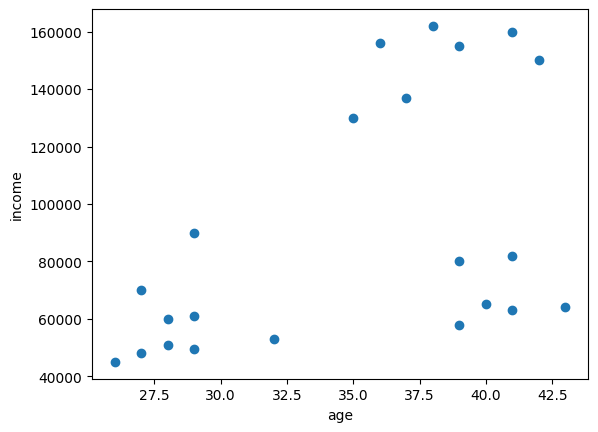

In [15]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv("/content/drive/MyDrive/income.csv")
df.head()
plt.scatter(df.age,df['income'])
plt.xlabel('age')
plt.ylabel('income')




In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','income']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [20]:
df['cluster']=y_predicted
df.head()


,name,age,income,cluster
0,rob,27,70000,2
1,michel,29,90000,2
2,mohan,29,61000,0
3,ismail,28,60000,0
4,kory,42,150000,1


In [23]:

km.cluster_centers_


array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

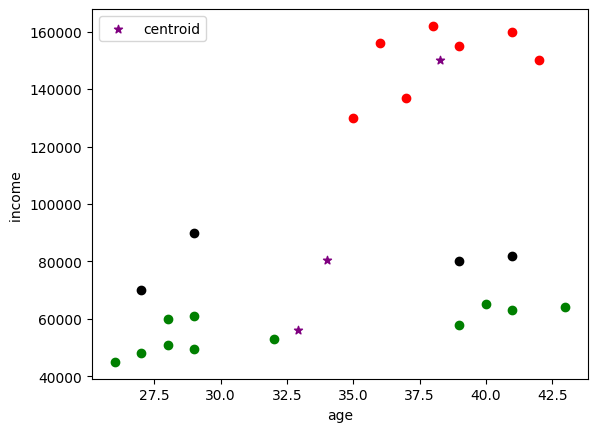

In [25]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['income'],color='green')
plt.scatter(df2.age,df2['income'],color='red')
plt.scatter(df3.age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('income ')
plt.legend()

In [26]:
scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])
df.head()

,name,age,income,cluster
0,rob,0.058824,0.213675,2
1,michel,0.176471,0.384615,2
2,mohan,0.176471,0.136752,0
3,ismail,0.117647,0.128205,0
4,kory,0.941176,0.897436,1


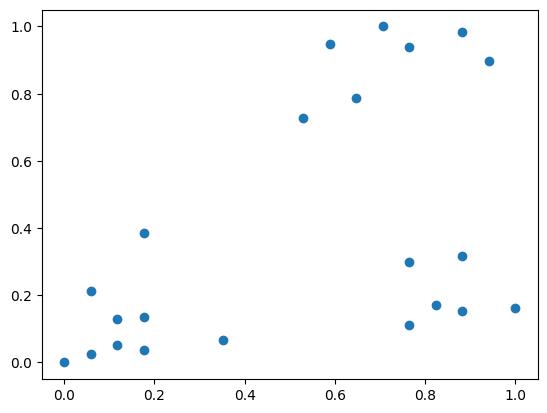

In [28]:


plt.scatter(df.age,df['income'])

In [29]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','income']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [30]:
df['cluster']=y_predicted
df.head()

,name,age,income,cluster
0,rob,0.058824,0.213675,1
1,michel,0.176471,0.384615,1
2,mohan,0.176471,0.136752,1
3,ismail,0.117647,0.128205,1
4,kory,0.941176,0.897436,2


In [31]:
km.cluster_centers_


array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

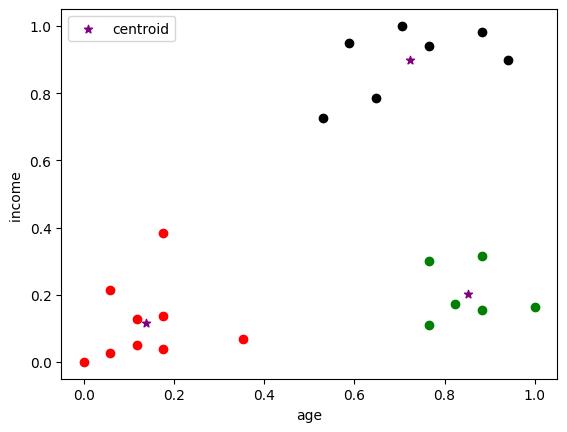

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['income'],color='green')
plt.scatter(df2.age,df2['income'],color='red')
plt.scatter(df3.age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('income ')
plt.legend()

In [36]:
sse = []
k_rng = range(1,10)
for k in k_rng:
   km = KMeans(n_clusters=k)
   km.fit(df[['age','income']])
   sse.append(km.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [37]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2798062931046179,
 0.21055478995472496,
 0.1685851223602976,
 0.1327661931978319,
 0.1038375258660356]

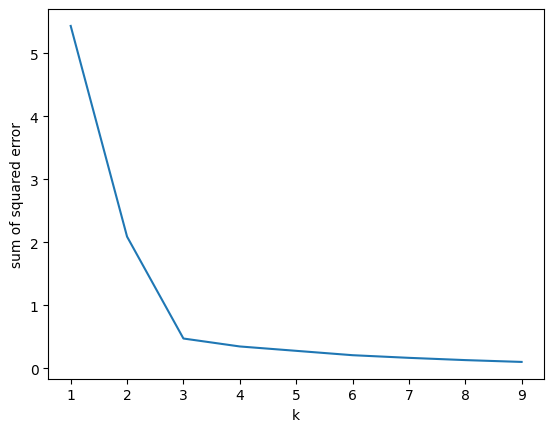

In [40]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)